In [1]:
# libraries needed....
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the files with the help of pandas....
df = pd.read_csv('smsspamcollection.tsv', delimiter='\t', encoding='latin1')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
# Checking the information of the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [4]:
# checking is there is any nall values are there in the dataset or not ?
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

There is no null values present in the dataset that's a good thing

In [5]:
# checking the shape and the dimention of the dataset !!
print(f'The total shape of the dataset is : {df.shape}')
print(f'The dimention of the dataset is : {df.ndim}')

The total shape of the dataset is : (5572, 4)
The dimention of the dataset is : 2


In [6]:
df.head(5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


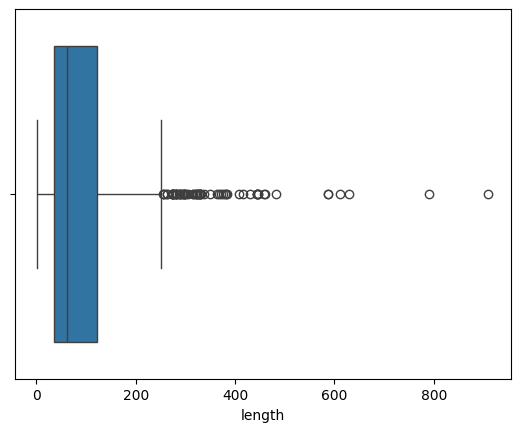

In [7]:
# Checking the outliers for every columns using the box plotting....
sns.boxplot(x = 'length', data = df)
plt.show()

There are outliers (+ve) present in this length columns

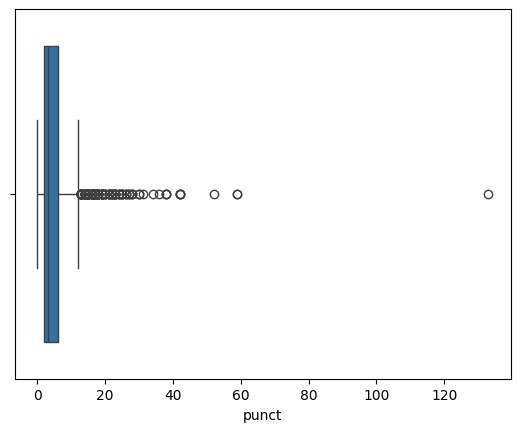

In [8]:
sns.boxplot(x = 'punct', data = df)
plt.show()

We are working with the outliers because the long texts containes the spam emails and the data is also not very large so if we remove the datas maybe the important data gets removed so for this matter I am approaching with tihs data itself

In [9]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
# Applying the LableEncoding to the lable column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [11]:
df.head()

,label,message,length,punct
0,0,"Go until jurong point, crazy.. Available only ...",111,9
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,0,U dun say so early hor... U c already then say...,49,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2


After Label encoding the output is '0' is for ham and '1' is for spam....

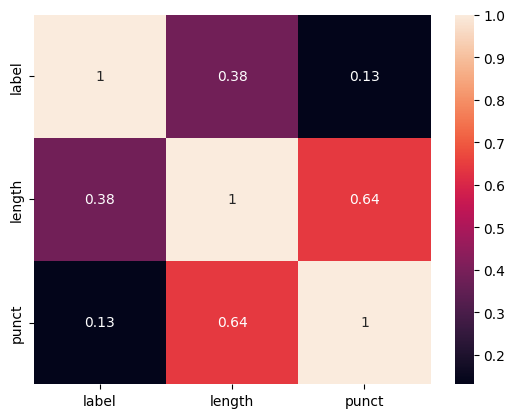

In [12]:
# Checking the correlation of the dataset
sns.heatmap(df.corr(numeric_only=True), annot = True); plt.show()

In [13]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [14]:
# Applying TF-TDF for converting the message into numbers for applying in the machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
x = tfid.fit_transform(df['message'])
y = df.label

In [15]:
df.head()

,label,message,length,punct
0,0,"Go until jurong point, crazy.. Available only ...",111,9
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,0,U dun say so early hor... U c already then say...,49,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,2


In [16]:
# Doing the train_test_splliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15, random_state=1, shuffle=True)

In [17]:
print(f'This is the train data shape: {x_train.shape}')
print(f'This is the test data shape: {x_test.shape}')

This is the train data shape: (4736, 8749)
This is the test data shape: (836, 8749)


In [18]:
# Building the machine learning model (SVM -> linearSVC)
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

Applied the Linear support vector classifier because its fast and give good result in the high dimention datasets and in the test classification datasets mainly

In [19]:
# Evalution of the model....
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
print(f'The classification report of the model is : {classification_report(y_test,y_pred)}')

The classification report of the model is :               precision    recall  f1-score   support

           0       0.99      1.00      0.99       723
           1       0.99      0.91      0.95       113

    accuracy                           0.99       836
   macro avg       0.99      0.96      0.97       836
weighted avg       0.99      0.99      0.99       836



This is the accuracy of the model and the precision score is 99 per and recall is for ham -> 100 per for spam -> 91 per

In [20]:
# This is the overall score of the model -> 98 % accurate
print(f'Testing score: {model.score(x_test,y_test)}')
print(f'Training score: {model.score(x_train,y_train)}')

Testing score: 0.9868421052631579
Training score: 0.9995777027027027


In [23]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(model,file)